In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [17]:
df_h = pd.read_csv('hepatitis_csv.csv')
df_h['sex'].replace(['male', 'female'],[0,1], inplace=True)
df_h['class'].replace(['die', 'live'],[0,1], inplace=True)
df_h*=1
df_h.fillna(df_h.median(), inplace=True)
df_h.loc[:,['albumin','age']].to_csv('hepatitis_reg.csv', index=False)


In [18]:
df_d = pd.read_csv('diabetes_csv.csv')
df_d.loc[:,['Glucose','Age']].to_csv('diabetes_reg.csv', index=False)

In [19]:
df = pd.read_csv('diabetes_reg.csv')
X = np.array(df['Glucose']).reshape(-1, 1)
y = np.array(df['Age']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.0438657867941451


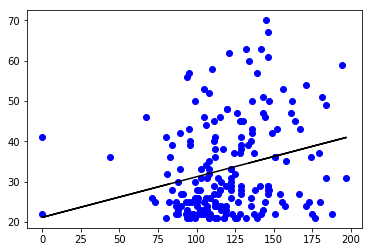

In [20]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()

In [22]:
df = pd.read_csv('hepatitis_reg.csv')
X = np.array(df['albumin']).reshape(-1, 1)
y = np.array(df['age']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.06106746854982914


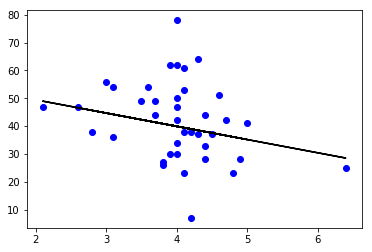

In [23]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()

In [36]:
hours = [0,1,2.3,3,4.6,5,5.7,6.1,8.5,9.6] 
output = [0,2,2.8,3.3,4.1,5.5,6.2,9,9,9.1 ]
df = pd.DataFrame(list(zip(hours, output)),
               columns =['hours', 'output'])
df.to_csv('data.csv',index=False)
X = np.array(hours)
y = np.array(output)
X2 = np.square(X)
n = len(X)
sX = np.sum(X)
sY = np.sum(y)
xy = np.multiply(X,y)
a = ((np.sum(X2)*sY) - (sX*np.sum(xy)))/(n*np.sum(X2) - np.square(sX))
b = (n*np.sum(xy) - sX*sY) /(n*np.sum(X2) - np.square(sX))
rmse = lambda yhat,y: np.sqrt(np.mean((yhat-y)**2))
pred = a + b*X
pred
yhat = lambda X : a+ b*X

RMSE : 0.9106114960053969


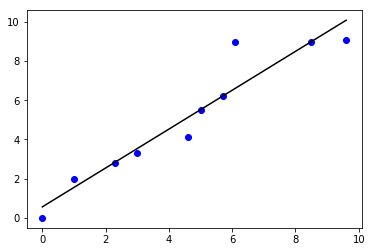

In [37]:
plt.scatter(X, y, color ='b')
plt.plot(X, pred, color ='k')
print(f"RMSE : {rmse(pred,y)}")
plt.show()

In [38]:
yhat(10)

10.483612289617234